In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Optimization Functions

In [72]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from data.simulation_functions import *
import matplotlib.ticker as mtick
n_data = 100
func = GoldsteinPrice(n_data)
features = func.build_features(n_data).sort(axis=0).values

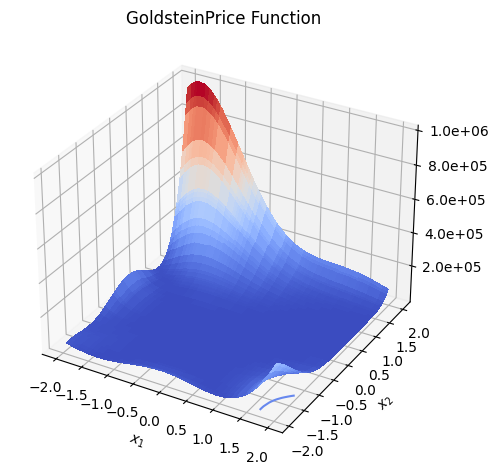

In [77]:

x = features[:,0].numpy()
y = features[:,1].numpy()
X, Y = np.meshgrid(x, y)
Z = func.calculate_targets(torch.Tensor(X), torch.Tensor(Y)).numpy()
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, antialiased=False)
ax.contour(X, Y, Z, offset=0, cmap=cm.coolwarm)
ax.set_title(type(func).__name__ + " Function")
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.zaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
ax.zaxis.set_tick_params(pad=10)
#ax.set_zlabel(r"$f(x_1,x_2)$", labelpad=20)
fig.tight_layout()
#fig.savefig("report/optimization_funcs/" + type(func).__name__, bbox_inches="tight")

# SIR Simulations

In [80]:
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from data.epidemiology import Epidemiology
from torch.distributions.uniform import Uniform
beta_dist = Uniform(0.02, 0.09)
gamma_dist = Uniform(0.002, 0.01)
ds = Epidemiology(beta_dist, gamma_dist, 100, 25, 3)
dataloader = DataLoader(ds, batch_size=32)

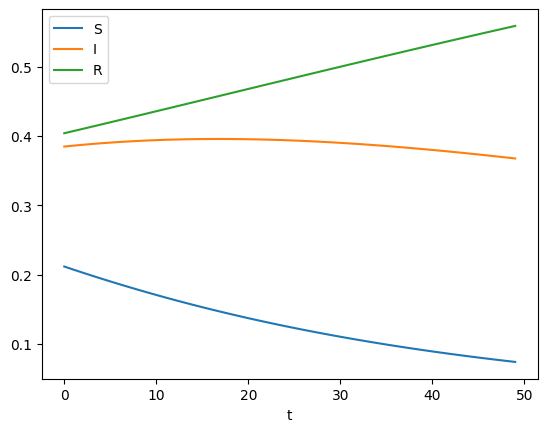

In [84]:
import matplotlib.pyplot as plt
import torch
from data.epidemiology import Epidemiology
from torch.distributions.uniform import Uniform
beta_dist = Uniform(0.02, 0.09)
gamma_dist = Uniform(0.002, 0.01)
ds = Epidemiology(beta_dist, gamma_dist, 1, 50, 1)
dataloader = DataLoader(ds, batch_size=32)
fig, ax = plt.subplots()
for beta, gamma,X, y in dataloader:
    X = torch.concat((X[:,:1,:], y), dim=1)
    ax.plot(X[:,:,0].T, label="S")
    ax.plot(X[:,:,1].T, label="I")
    ax.plot(X[:,:,2].T, label="R")
ax.set_xlabel("t");
ax.legend()

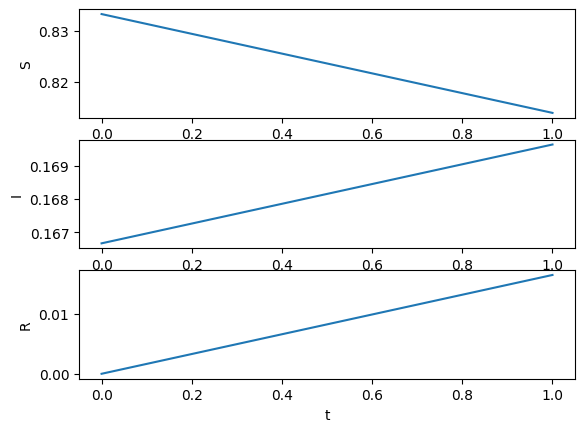

In [43]:
beta_dist = Uniform(0.1, 0.25)
gamma_dist = Uniform(0.05, 0.1)
ds = Epidemiology(beta_dist, gamma_dist, 2, 1, 1, "test")
fig, ax = plt.subplots(3,1)
for X,y in ds:
    X = torch.concat((X[:1],y), dim=0)
    ax[0].plot(X[:,0])
    ax[1].plot(X[:,1])
    ax[2].plot(X[:,2])
ax[0].set_ylabel("S")
ax[1].set_ylabel("I")
ax[2].set_ylabel("R")
ax[2].set_xlabel("t");